<a href="https://colab.research.google.com/github/PhuongThaoNguyen04/CollegeAssignment/blob/master/Modelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# IMDb Data Analysis Project



# Objective
The objective of this project is to analyze historical data on media content, such as movies and TV shows, to identify patterns and trends in audience preferences and engagement, focusing on metrics like average ratings and total votes. By employing time-series forecasting models like Prophet, the project aims to predict future values of these metrics, enabling stakeholders to anticipate shifts in audience behavior. The purpose is to provide actionable insights that support strategic planning for content creation, distribution, and audience targeting while enhancing analytical skills through the application of advanced machine learning techniques.

<h1>IMDb Dataset



In [ ]:
# Import necessary libraries and load the dataset into pandas Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Data Import</h3>
<p> Import the dataset


In [ ]:
# Import data into Datafram
df = pd.read_csv('/content/data.csv')

In [ ]:
# Data overview
print("Total number of collumns: {} ".format((df.shape[1])))

Total number of collumns: 7 


In [ ]:
df

,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,tvSeries,"Crime, Drama, Thriller",9.5,2220756,2008
1,tt5491994,Planet Earth II,tvMiniSeries,Documentary,9.5,161283,2016
2,tt0185906,Band of Brothers,tvMiniSeries,"Drama, History, War",9.4,542837,2001
3,tt0795176,Planet Earth,tvMiniSeries,"Documentary, Family",9.4,222817,2006
4,tt5152226,Tree of Life,tvSeries,Drama,9.4,11445,2014
...,...,...,...,...,...,...,...
6030,tt3089778,The Treatment,movie,"Crime, Mystery, Thriller",7.1,10190,2014
6031,tt0252684,Manic,movie,Drama,7.1,10171,2001
6032,tt0072353,Going Places,movie,"Action, Comedy, Crime",7.1,10125,1974
6033,tt7695916,Tell Me a Story,tvSeries,"Drama, Thriller",7.1,10084,2018


In [ ]:
df.head()

,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,tvSeries,"Crime, Drama, Thriller",9.5,2220756,2008
1,tt5491994,Planet Earth II,tvMiniSeries,Documentary,9.5,161283,2016
2,tt0185906,Band of Brothers,tvMiniSeries,"Drama, History, War",9.4,542837,2001
3,tt0795176,Planet Earth,tvMiniSeries,"Documentary, Family",9.4,222817,2006
4,tt5152226,Tree of Life,tvSeries,Drama,9.4,11445,2014


In [ ]:
df.columns

Index(['id', 'title', 'type', 'genres', 'averageRating', 'numVotes',
       'releaseYear'],
      dtype='object')

**According to the data source:**

**'id'**: Unique identifier for each movie/TV show.

**'title'**: Name of the movie/TV show

**'type'**: Format of the content (movie or TV show)

**'genres'**: Categories of the movie/ TV show

**'averageRating'**: Average user rating of the movie/ TV show

**'numVotes'**: Total number of user rating recieved.

**'releaseYear'**: Year the movie/ TV show was released.


# Exploratory Data Analysis (EDA)

**Dataset structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6035 non-null   object 
 1   title          6035 non-null   object 
 2   type           6035 non-null   object 
 3   genres         6035 non-null   object 
 4   averageRating  6035 non-null   float64
 5   numVotes       6035 non-null   int64  
 6   releaseYear    6035 non-null   int64  
 7   genres_list    6035 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 377.3+ KB


**Dataset descriptive statistics:**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
averageRating,6035.0,7.700895,0.466170,7.1,7.3,7.6,8.0,9.5
numVotes,6035.0,116212.666446,226405.770069,10002.0,16514.5,33218.0,104081.5,2953131.0
releaseYear,6035.0,2000.621044,21.644713,1916.0,1992.0,2008.0,2017.0,2024.0


<h3>Data Preprocessing</h3>

* Remove any columns like ID
* Convert text variables to numeric
* Split into X and Y
* Split into training and testing
* Handle any missing data

**Checking for any missing data:**

In [ ]:
# Na value check
df.isna().sum()

,0
id,0
title,0
type,0
genres,0
averageRating,0
numVotes,0
releaseYear,0


**Checking for duplicate value in the dataset:**

In [ ]:
# Check for duplicates
dup_total = df.duplicated().sum()
dup_per = df.duplicated().sum() / df.shape[0]
print("Total number of duplicates:{} \nPersentage of missing value: {:.4f}%".format(dup_total, dup_per))

Total number of duplicates:0 
Persentage of missing value: 0.0000%


No missing data

No columns to drop

**Distribution**

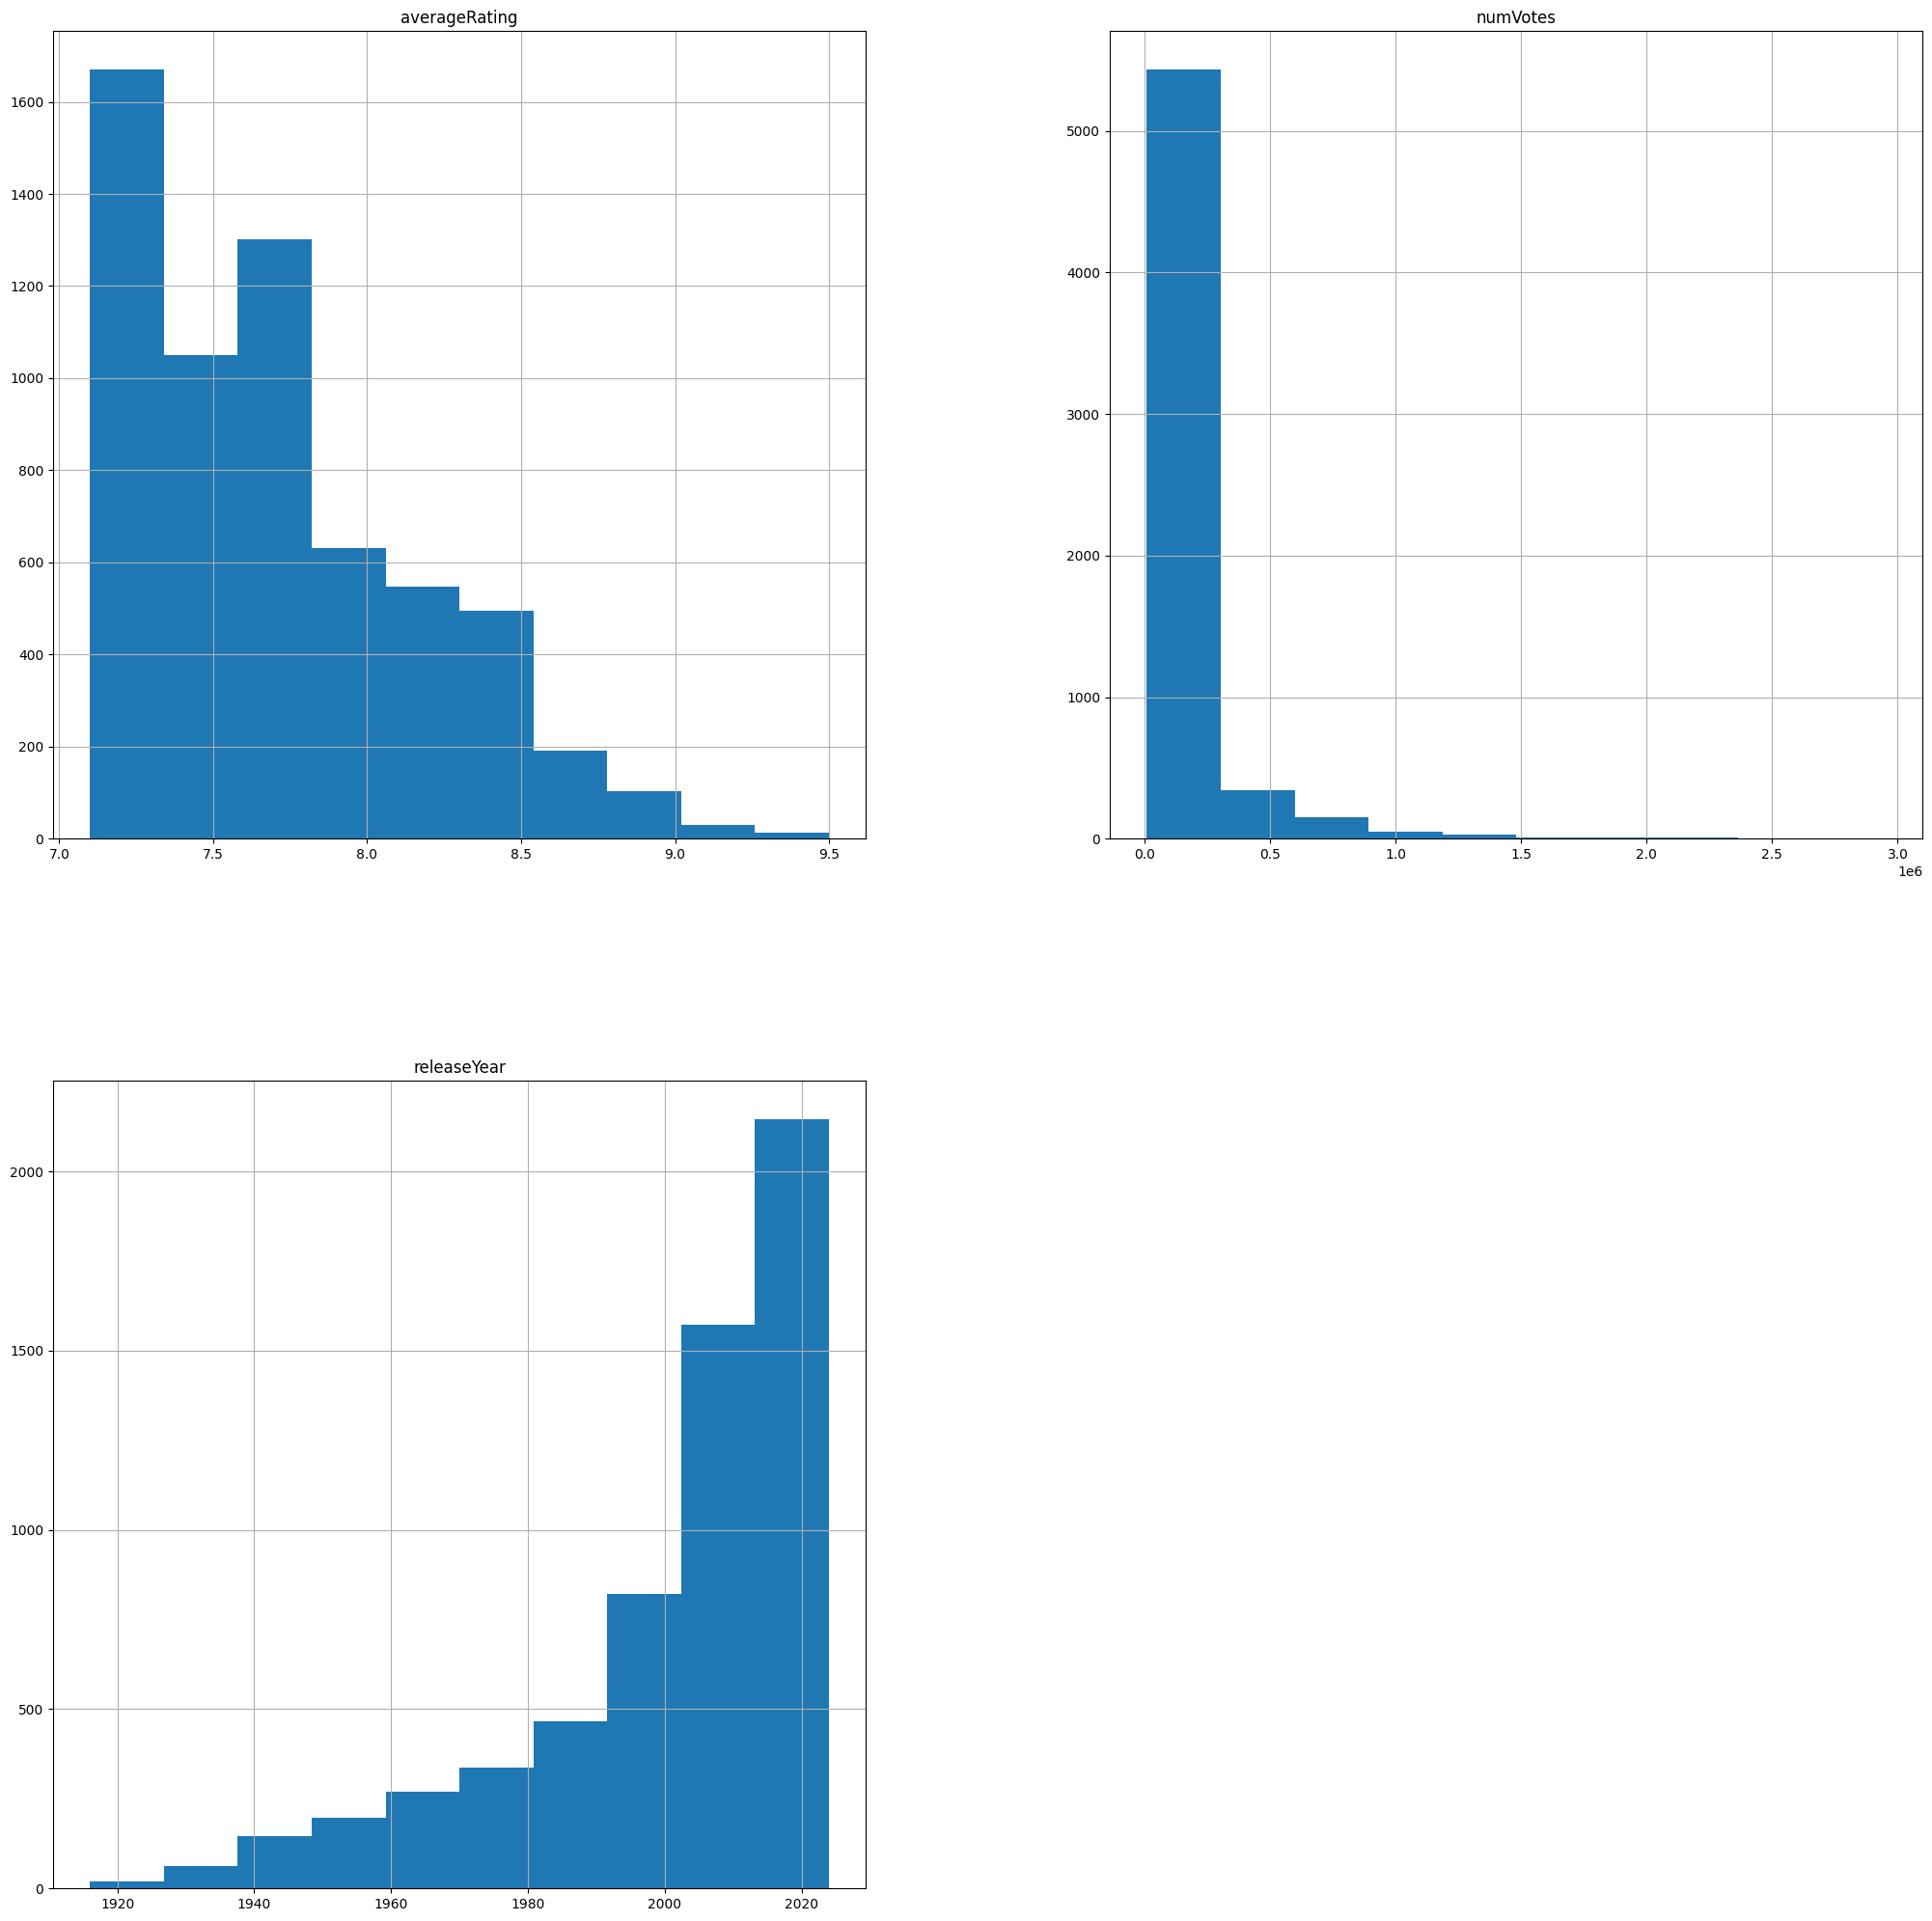

In [ ]:
# feature distribution
# evaluating distributions of the features
hist_plot = df.hist(figsize=(25, 25))

In [ ]:
df.genres.value_counts()

,count
genres,
Drama,390
"Comedy, Drama",290
"Crime, Drama, Mystery",234
"Drama, Romance",229
"Comedy, Drama, Romance",220
...,...
"Adventure, Family, Reality-TV",1
"Documentary, Music, Thriller",1
"Comedy, Romance, Thriller",1


In [ ]:
df.averageRating.value_counts()

,count
averageRating,
7.3,574
7.1,562
7.2,534
7.5,527
7.4,524
7.6,484
7.7,430
7.8,388
8.0,319


In [ ]:
df.numVotes.value_counts()

,count
numVotes,
10606,3
17789,3
12313,3
17372,3
12501,3
...,...
10443,1
10618,1
10800,1


In [ ]:
df.releaseYear.value_counts()

,count
releaseYear,
2019,251
2016,226
2022,219
2018,215
2015,211
...,...
1921,2
1929,2
1920,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer

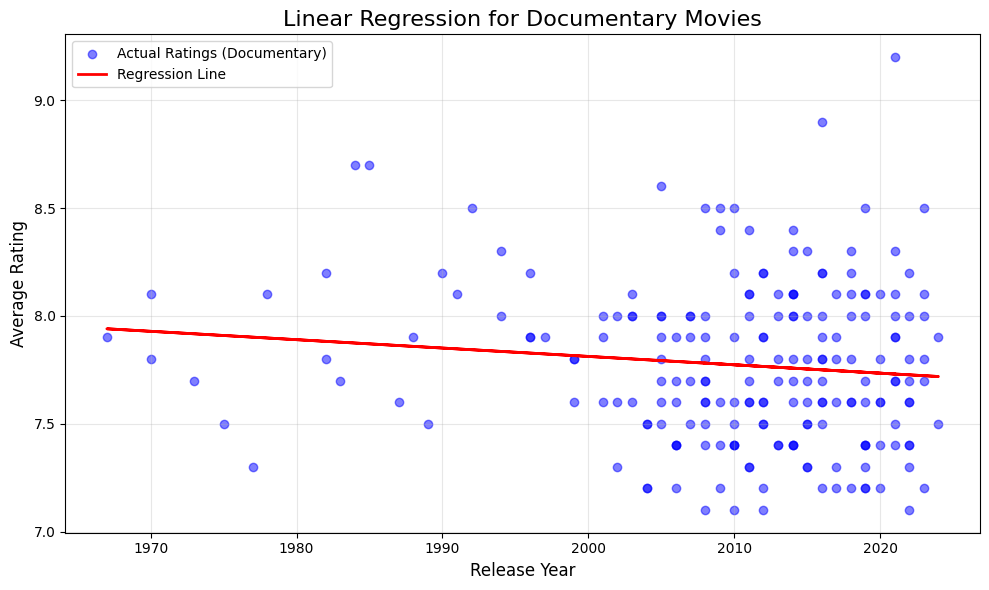

Intercept: 15.572919722755515
Slope: -0.0038803813738570118


In [ ]:
#import pandas for dataframe management, numpy for operations pyplot for plotting AND SKLEARN sliner model for linear regression function and array creation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

movies_df = df[(df['type'] == 'movie') & (df['releaseYear'] > 1960)]
selected_genre = 'Documentary'
genre_movies = movies_df[movies_df['genres'].str.contains(selected_genre, na=False)]
#create dataframe from csv filter for movies assign to new dataframe filter for genre matching string "selected_genre" and assign to new dataframe
x = genre_movies[['releaseYear']].values
y = genre_movies['averageRating'].values
model = LinearRegression()
model.fit(x, y)
predicted_ratings = model.predict(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label=f'Actual Ratings ({selected_genre})')
plt.plot(x, predicted_ratings, color='red', linewidth=2, label='Regression Line')
plt.title(f'Linear Regression for {selected_genre} Movies', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

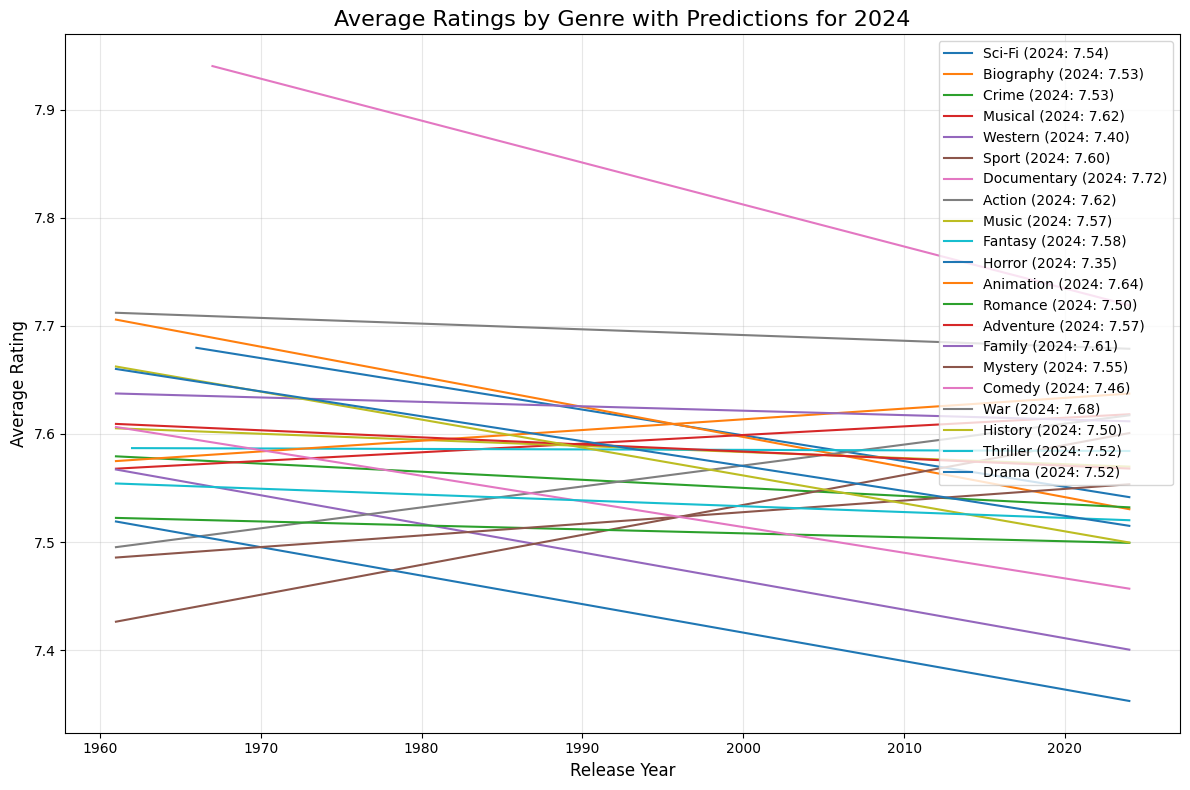

Documentary: Prediction for 2024 : 7.72
War: Prediction for 2024 : 7.68
Animation: Prediction for 2024 : 7.64
Musical: Prediction for 2024 : 7.62
Action: Prediction for 2024 : 7.62
Family: Prediction for 2024 : 7.61
Sport: Prediction for 2024 : 7.60
Fantasy: Prediction for 2024 : 7.58
Music: Prediction for 2024 : 7.57
Adventure: Prediction for 2024 : 7.57
Mystery: Prediction for 2024 : 7.55
Sci-Fi: Prediction for 2024 : 7.54
Crime: Prediction for 2024 : 7.53
Biography: Prediction for 2024 : 7.53
Thriller: Prediction for 2024 : 7.52
Drama: Prediction for 2024 : 7.52
History: Prediction for 2024 : 7.50
Romance: Prediction for 2024 : 7.50
Comedy: Prediction for 2024 : 7.46
Western: Prediction for 2024 : 7.40
Horror: Prediction for 2024 : 7.35


In [ ]:
movies_df = df[(df['type'] == 'movie') & (df['releaseYear'] > 1960)]
#Make list of all genres, strip whitespace and delimeters to avoid duplicate entries and to handle cases with multiple genres
all_genres = set(genre for sublist in movies_df['genres'].dropna().str.replace(' ', '').str.split(',') for genre in sublist)

# Create Prediction Dictionary
genre_predictions = {}

# new plot figure 12 inches by 8 inches
plt.figure(figsize=(12, 8))

for genre in all_genres:
    #Check to see if the movie fits the genre
    genre_movies = movies_df[movies_df['genres'].str.contains(genre, na=False)]

    if len(genre_movies) < 10:
        continue #Skip any genre with less than 10 entries

    # assign values to a numpy array to pass into model
    x = genre_movies[['releaseYear']].values
    y = genre_movies['averageRating'].values

    # Train linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predict ratings for the range of years
    year_range = np.arange(min(genre_movies['releaseYear']), 2025).reshape(-1, 1)
    predicted_ratings = model.predict(year_range)

    # Predict the rating for 2024
    rating_2024 = model.predict([[2024]])[0]
    genre_predictions[genre] = rating_2024

    # Plot trend line
    plt.plot(year_range, predicted_ratings, label=f'{genre} (2024: {rating_2024:.2f})')

# Highlight predictions for 2024
plt.title('Average Ratings by Genre with Predictions for 2024', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print Predicitons highest to lowest
sorted_predictions = sorted(genre_predictions.items(), key=lambda x: x[1], reverse=True)
for genre, rating in sorted_predictions: print(f"{genre}: Prediction for 2024 : {rating:.2f}")


In [ ]:
# Preprocess the 'genres' column
# Split genres into lists and apply one-hot encoding
df['genres_list'] = df['genres'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres_list']), columns=mlb.classes_)

In [ ]:
# Combine encoded genres with numerical features
features = pd.concat([genres_encoded, df[['numVotes', 'releaseYear']]], axis=1)

In [ ]:
# Define the target variable (averageRating)
target = df['averageRating']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Train a decision tree regressor
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Make predictions
y_pred = decision_tree.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.2116297162913184, 0.08130131623549297)

In [ ]:
import matplotlib.pyplot as plt

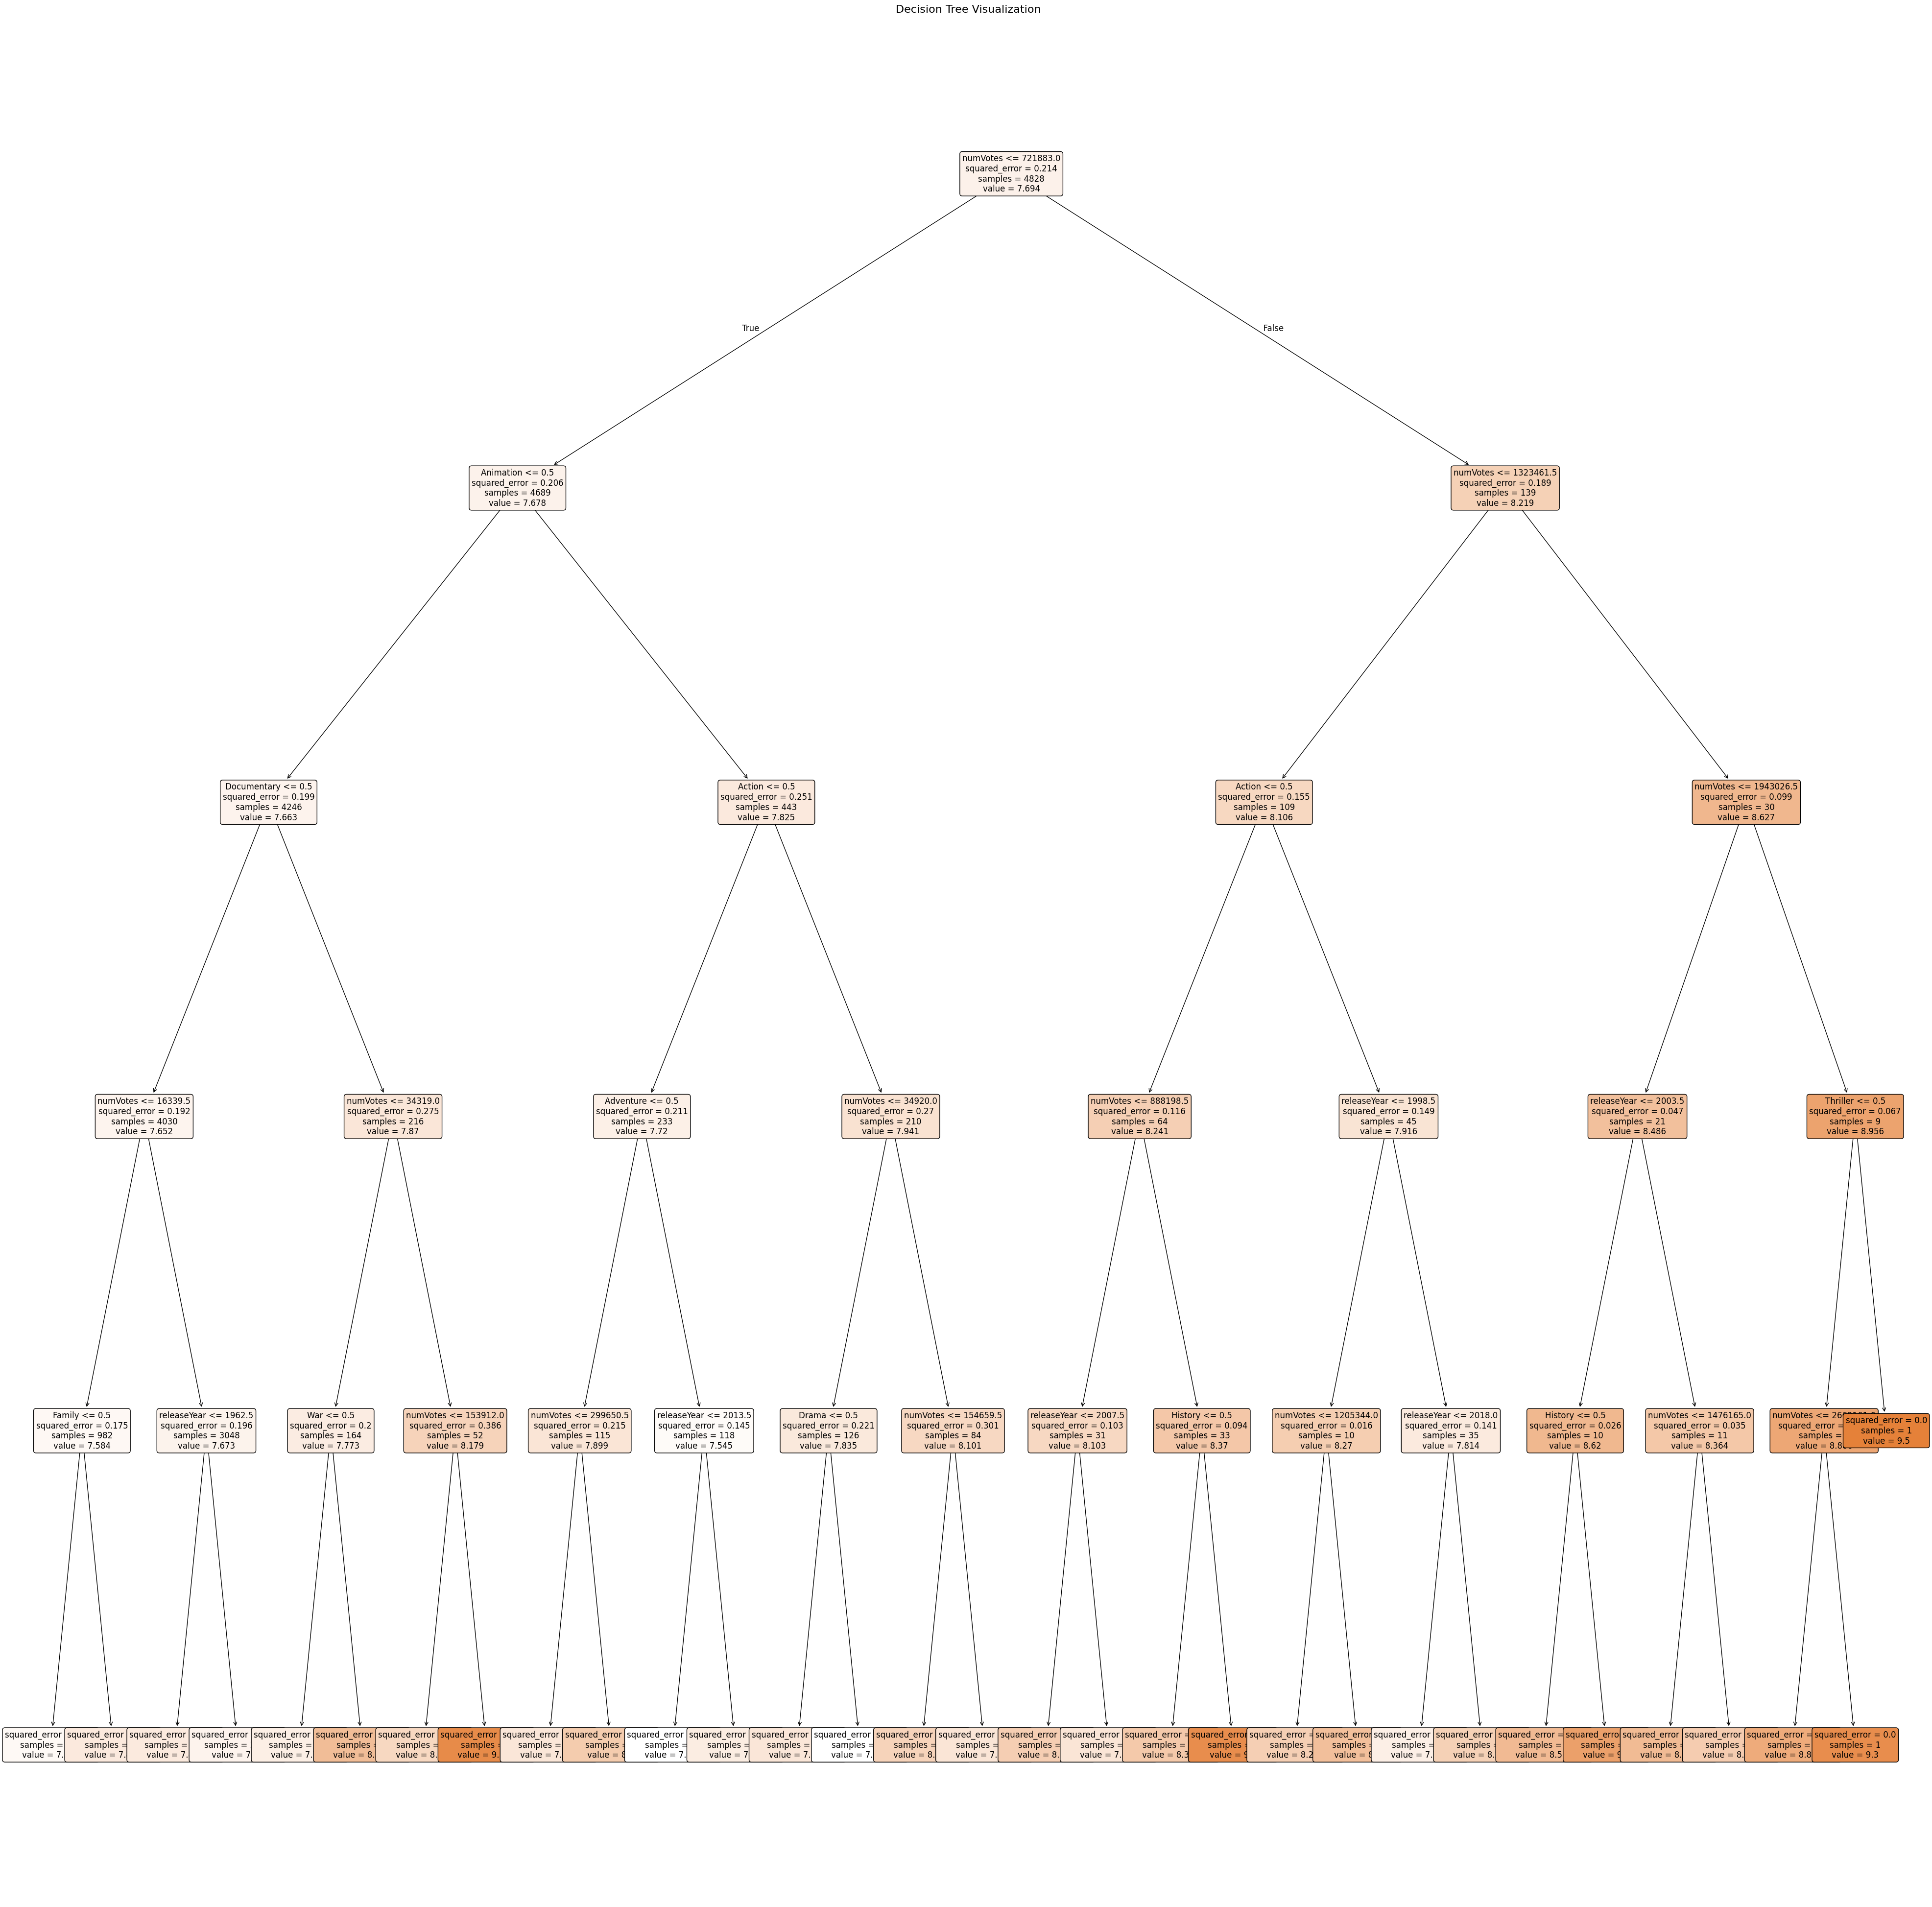

In [ ]:
#Plot the decision tree
plt.figure(figsize=(50, 50))  # Adjust the figure size for better readability
plot_tree(
    decision_tree,
    feature_names=features.columns,  # Feature names for better understanding
    filled=True,                    # Color nodes to indicate purity
    rounded=True,                   # Rounded edges for aesthetics
    fontsize=12                     # Font size for readability
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [ ]:
from prophet import Prophet

# Prepare Data
time_series_data = df.groupby('releaseYear')['averageRating'].mean().reset_index()
time_series_data.columns = ['ds', 'y']  # Rename columns for Prophet
# Ensure 'ds' is in datetime format
time_series_data['ds'] = pd.to_datetime(time_series_data['ds'], format='%Y')

print(time_series_data.head())

          ds         y
0 1916-01-01  7.700000
1 1919-01-01  7.200000
2 1920-01-01  8.000000
3 1921-01-01  8.100000
4 1922-01-01  7.666667


In [ ]:
# Define the split point: 80% for training, 20% for testing
train_size = int(len(time_series_data) * 0.8)

#Split the data
train_data = time_series_data.iloc[:train_size]
test_data = time_series_data.iloc[train_size:]

print(f"Train set:\n{train_data.tail()}")
print(f"\nTest set:\n{test_data.head()}")

Train set:
           ds         y
80 1998-01-01  7.579221
81 1999-01-01  7.723333
82 2000-01-01  7.657831
83 2001-01-01  7.722353
84 2002-01-01  7.637234

Test set:
           ds         y
85 2003-01-01  7.702727
86 2004-01-01  7.729710
87 2005-01-01  7.672500
88 2006-01-01  7.660000
89 2007-01-01  7.642759


In [ ]:
# Initialize and Train Prophet Model
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrl5r0mc/1iqxcepr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnrl5r0mc/jmj95iec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78866', 'data', 'file=/tmp/tmpnrl5r0mc/1iqxcepr.json', 'init=/tmp/tmpnrl5r0mc/jmj95iec.json', 'output', 'file=/tmp/tmpnrl5r0mc/prophet_model10xyus5a/prophet_model-20241216234619.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:46:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create Future DataFrame for test set dates
future = test_data[['ds']]

#Predict for the test set
forecast = model.predict(future)

#Combine actual and predicted values
results = test_data.copy()
results['yhat'] = forecast['yhat']

print(results)

            ds         y  yhat
85  2003-01-01  7.702727   NaN
86  2004-01-01  7.729710   NaN
87  2005-01-01  7.672500   NaN
88  2006-01-01  7.660000   NaN
89  2007-01-01  7.642759   NaN
90  2008-01-01  7.674809   NaN
91  2009-01-01  7.663571   NaN
92  2010-01-01  7.701351   NaN
93  2011-01-01  7.700000   NaN
94  2012-01-01  7.658491   NaN
95  2013-01-01  7.701149   NaN
96  2014-01-01  7.765306   NaN
97  2015-01-01  7.731280   NaN
98  2016-01-01  7.717257   NaN
99  2017-01-01  7.703046   NaN
100 2018-01-01  7.739535   NaN
101 2019-01-01  7.799203   NaN
102 2020-01-01  7.720787   NaN
103 2021-01-01  7.734450   NaN
104 2022-01-01  7.736986   NaN
105 2023-01-01  7.720988   NaN
106 2024-01-01  7.758025   NaN


In [ ]:
# Ensure the dates (ds) match between test and forecast
# Extract only the predicted values and date
forecast_results = forecast[['ds', 'yhat']]

# Merge test (actual values) with forecast results
results = test_data.merge(forecast_results, on='ds', how='left')

# Display the combined dataframe
print(results)


           ds         y      yhat
0  2003-01-01  7.702727  7.624196
1  2004-01-01  7.729710  7.660729
2  2005-01-01  7.672500  7.666003
3  2006-01-01  7.660000  7.622720
4  2007-01-01  7.642759  7.619305
5  2008-01-01  7.674809  7.655838
6  2009-01-01  7.663571  7.661112
7  2010-01-01  7.701351  7.617830
8  2011-01-01  7.700000  7.614414
9  2012-01-01  7.658491  7.650948
10 2013-01-01  7.701149  7.656221
11 2014-01-01  7.765306  7.612939
12 2015-01-01  7.731280  7.609523
13 2016-01-01  7.717257  7.646057
14 2017-01-01  7.703046  7.651330
15 2018-01-01  7.739535  7.608048
16 2019-01-01  7.799203  7.604632
17 2020-01-01  7.720787  7.641166
18 2021-01-01  7.734450  7.646439
19 2022-01-01  7.736986  7.603157
20 2023-01-01  7.720988  7.599741
21 2024-01-01  7.758025  7.636275


In [ ]:
#Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
mae = np.mean(np.abs(results['y'] - results['yhat']))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.09344419750950321
MAE: 0.07842294711678904


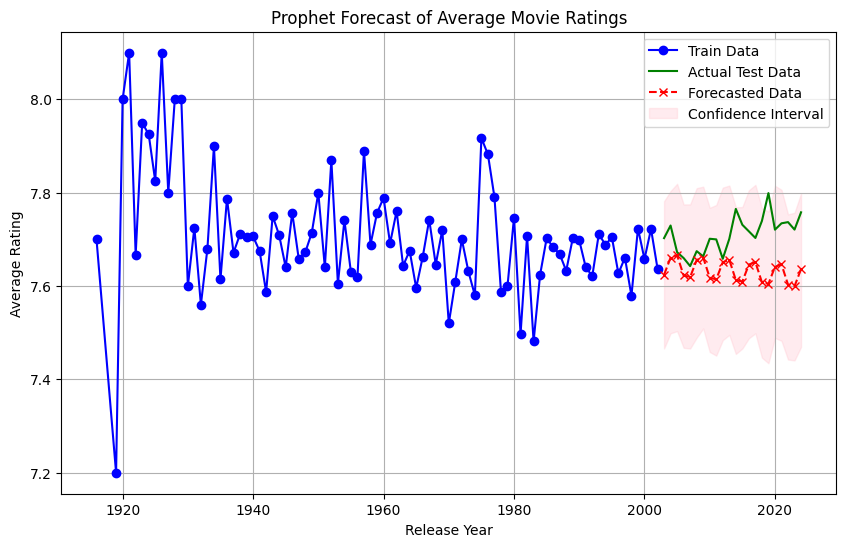

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data', color='blue', marker='o')
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Data', color='green')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red', linestyle='--', marker='x')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')

# Titles and Labels
plt.title('Prophet Forecast of Average Movie Ratings')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.show()
